In [1]:
import numpy as np
import hera_pspec
import astropy.units as u
import astropy.coordinates as aco
import matplotlib.pyplot as plt

/lustre/aoc/projects/hera/jaguirre/anaconda3/envs/hera/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
path = '/lustre/aoc/projects/hera/pchichur/HERA19/2457548/LSThrs_10.5-23.0/FREQrng_530_730/'

In [2]:
uvp_before = hera_pspec.UVPSpec().read_hdf5(path+'8_days_LST_10.50_16.75_pI.uvh5.UVP')

In [6]:
uvp_before = hera_pspec.UVPSpec()
uvp_before.read_hdf5(path+'8_days_LST_10.50_16.75_pI.uvh5.UVP')
uvp_during = hera_pspec.UVPSpec()
uvp_during.read_hdf5(path+'8_days_LST_16.75_18.75_pI.uvh5.UVP')
uvp_after = hera_pspec.UVPSpec()
uvp_after.read_hdf5(path+'8_days_LST_18.75_23.00_pI.uvh5.UVP')

In [43]:
print uvp_before.data_array[0].shape

(831285, 200, 1)


In [42]:
print len(uvp_before.blpair_array)
print len(uvp_before.blpair_array)/105.
print uvp_before.blpair_array
#print 15.*14./2.

831285
7917.0
[109153109153 109153109153 109153109153 ... 172196172196 172196172196
 172196172196]


In [40]:
uvp_before.antnums_to_blpair(((9, 20), (9, 20)))

109120109120

In [46]:
nt_before = len(uvp_before.blpair_array)/105.
print (nt_before*10.7*2.)/3600.
print (16.75-10.5)*8.

47.0621666667
50.0


In [47]:
blp_grps, lens, angs, tags = hera_pspec.utils.get_blvec_reds(uvp_before, bl_error_tol=1.0, match_bl_lens=True)
blps = [blp_grp[0] for blp_grp in blp_grps]
b = blps[0]
print b

((9, 20), (9, 20))


In [48]:
blps

[((9, 20), (9, 20)),
 ((9, 31), (9, 31)),
 ((9, 89), (9, 89)),
 ((9, 10), (9, 10)),
 ((10, 104), (10, 104)),
 ((10, 64), (10, 64)),
 ((10, 88), (10, 88)),
 ((72, 96), (72, 96))]

In [51]:
uvp_before.integration_array[0].shape

(831285, 1)

0.0
21.4748363494
15.67390357171605
0.668113823779


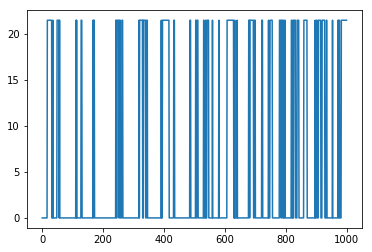

In [61]:
t_int_before = uvp_before.integration_array[0]
plt.plot(t_int_before[0:1000])
print t_int_before.min()
print t_int_before.max()
print t_int_before.sum()/105./3600.
print len(t_int_before[t_int_before == 0.])/float(len(t_int_before))

In [65]:
print uvp_before.nsample_array[0].sum()
print uvp_before.nsample_array[0].min()
print uvp_before.nsample_array[0].max()

831285.0
1.0
1.0


In [ ]:
uvp_before_avg = uvp_before.average_spectra(blpair_groups=blp_grps, time_avg=True, inplace=False)

In [85]:
Tsys = 300
P_N_before = uvp_before_avg.generate_noise_spectra(0, 'pI', Tsys, blpairs=blps, real=True)#[u_before.antnums_to_blpair(b)][0]

In [86]:
print uvp_before_avg.data_array[0].shape
P_N_before[109120109120].shape

(8, 200, 1)


(1, 200)

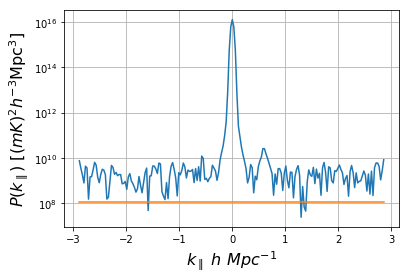

In [87]:
hera_pspec.plot.delay_spectrum(uvp_before_avg, blpairs=[blps[0]], spw=0, pol='pI', delay=False)
plt.plot(uvp_before_avg.get_kparas(0),P_N_before[P_N_before.keys()[0]].squeeze())
#plt.title('before GC, Tsys=3000')
plt.grid()
plt.show()

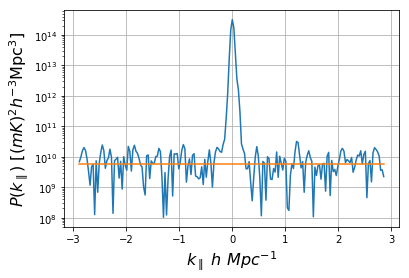

In [84]:
hera_pspec.plot.delay_spectrum(uvp_before_avg, blpairs=[blps[7]], spw=0, pol='pI', delay=False)
plt.plot(uvp_before_avg.get_kparas(0),P_N_before[P_N_before.keys()[7]].squeeze())
#plt.title('before GC, Tsys=3000')
plt.grid()
plt.show()

In [89]:
uvp_during_avg = uvp_during.average_spectra(blpair_groups=blp_grps, time_avg=True, inplace=False)

In [95]:
Tsys = 4000
P_N_during = uvp_during_avg.generate_noise_spectra(0, 'pI', Tsys, blpairs=blps, real=True)#[u_during.antnums_to_blpair(b)][0]

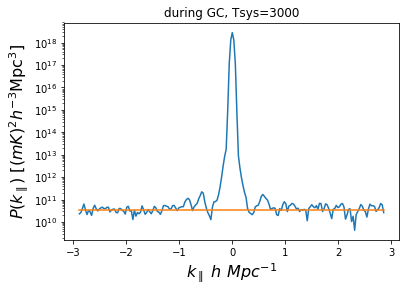

In [99]:
hera_pspec.plot.delay_spectrum(uvp_during_avg, blpairs=[blps[0]], spw=0, pol='pI', delay=False)
plt.plot(uvp_during_avg.get_kparas(0),P_N_during[P_N_during.keys()[0]].squeeze())
plt.title('during GC, Tsys=3000')
plt.show()

In [97]:
uvp_after_avg = uvp_after.average_spectra(blpair_groups=blp_grps, time_avg=True, inplace=False)

In [98]:
Tsys = 1000
P_N_after = uvp_after_avg.generate_noise_spectra(0, 'pI', Tsys, blpairs=blps, real=True)#[u_after.antnums_to_blpair(b)][0]

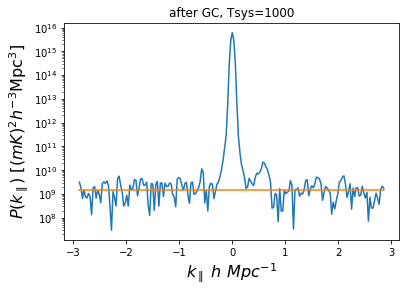

In [100]:
hera_pspec.plot.delay_spectrum(uvp_after_avg, blpairs=[blps[0]], spw=0, pol='pI', delay=False)
plt.plot(uvp_after_avg.get_kparas(0),P_N_after[P_N_after.keys()[0]].squeeze())
plt.title('after GC, Tsys='+str(Tsys))
plt.show()

In [102]:
print uvp_before.time_avg_array.min()
print uvp_before.time_avg_array.max()

2457548.1670615417
2457555.4031828158


In [110]:
jd7548 = np.unique(uvp_before.time_avg_array[uvp_before.time_avg_array.astype('int64') == 2457548])

In [111]:
jd7548.shape

(1029,)